# Explainable AI
Week 9 materials can be accessed [here](https://drive.google.com/drive/folders/12nrtsTAP9R4s9ydOVMcOxWEKi37Z-NVT?usp=sharing).

In week 9, we will focus a little more on how to interpret some of the models we've covered. EXplainable AI is a major purpose of an AI algorithm because we are always tring to understand what it's doing and not using them as a blackbox.

## Why is Explainability Important?

Explainable AI (XAI) or interpretable AI is crucial for ensuring that machine learning models are transparent, reliable, and trustworthy.

### **1️⃣ Enhancing Trust and Confidence**
- **Transparency**: Understanding how a model makes decisions builds trust in its outputs. This is especially important in critical applications where mistakes could have serious consequences. For instance, if we deploy a model to detect lead contamination over an extended period, we need to know how the model arrives at its conclusions. This insight can also help us explore whether the model could be applied to related problems.

- **Accountability**: Explainability makes it easier to **trace** and **justify** a model’s decisions. This is essential for identifying and correcting biases, ensuring fairness, and understanding the scientific principles behind why a model works. By improving transparency, we can extend model applications to new areas with greater confidence.

### **2️⃣ Improving Model Performance and Reliability**
- **Debugging and Improvement**: Interpretability helps developers **identify biases, errors, and limitations** in models. By understanding why a model makes certain predictions, we can target specific improvements, leading to more accurate and reliable systems.
  
- **Feature Importance**: Knowing which features contribute most to predictions helps researchers focus on **collecting and processing the most relevant data**, reducing costs and improving model efficiency.

This week, we will focus on **feature importance**, exploring which parts of the data contribute the most to a model’s inference process. This will help us understand model behavior and make data-driven optimizations.

---

## Understanding Feature Importance

Before diving into specific interpretability techniques like **feature importance in Polynomial Regression, Neural Networks, and Gaussian Processes (GPs)**, we first need a **foundational understanding of feature importance in interpretable machine learning**. This will prepare us to analyze how different models highlight significant input features.

### **What is Feature Importance?**
Feature importance helps us **identify which input features have the greatest influence on a model’s predictions**. This understanding is crucial for both developing and interpreting machine learning models, as it provides insights into:
- The **underlying structure of the data**.
- How the **model makes decisions**.
- Which features can be **optimized or discarded** to improve efficiency.

---

### **Intrinsic vs. Post Hoc Interpretability**
#### **Intrinsic Interpretability**
Some models, like **Polynomial Regression** and **Random Forests**, naturally provide feature importance. Their transparent structure allows us to extract importance scores directly from the model’s learned parameters (e.g., coefficients in polynomial regression).

#### 🔎 **Post Hoc Interpretability**
For complex models like **Neural Networks** and **Gaussian Processes**, feature importance is not readily available. Instead, we use **post hoc methods** such as:
- **Permutation Importance** (shuffling feature values and measuring impact).
- **SHAP (SHapley Additive Explanations)** (quantifying feature contributions to predictions).
- **Kernel Length-Scales in Gaussian Processes** (determining feature sensitivity).

These techniques **analyze the model’s outputs after training** to infer which features were most influential.

---

### **Feature Importance Across Different Models**
We will explore **three different methods** for assessing feature importance:

#### **1️⃣ Polynomial Regression - Coefficients as Feature Importance**
- Polynomial Regression extends linear models by including **squared** and **interaction** terms.
- **Feature importance is determined by the learned model coefficients**: larger absolute coefficients indicate greater influence.

#### **2️⃣ Neural Networks - Permutation Importance & SHAP**
- Neural Networks do not provide direct feature importance, so we use:
  - **Permutation Importance** (shuffling features to measure impact).
  - **SHAP Values** (assigning contribution scores to each feature).

#### **3️⃣ Gaussian Processes - ARD Kernel Length-Scales**
- Gaussian Process Regression (GPR) with an **ARD (Automatic Relevance Determination) kernel** assigns **individual length-scales** to each feature.
- **Smaller length-scales indicate higher importance**, as the model is more sensitive to those features.

---

### **🔎 Why Does This Matter?**
Feature importance analysis is not just theoretical; it has **practical implications** in:
**Optimising Models** – Removing unimportant features reduces complexity.  **Data Collection Strategies** – Prioritizing the most relevant data saves resources.  
**Making AI More Explainable** – Transparency improves trust and adoption of ML models.  

Through this exploration, we aim to understand what drives model decisions and how we can enhance interpretability across different machine learning approaches.




Below we dive in, we need to install 'GPy'. Because the numpy version it requires is different from the native numpy in colab session, please run the cell below and restart the session.

In [1]:
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 731.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [1]:
import numpy
print(numpy.__version__)

1.26.4


And now, please restart the session by: navigate to **Runtime → Restart session**.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = '/content/drive/MyDrive/GEOL0069/2324/Week_6/2425_test/s3_ML_dataset.npz' # change it to the directory where you saved the dataset from the last notebook

data = np.load(dataset_path)
input_features = data['X']
target_variables = data['y']

X_train, X_test, y_train, y_test = train_test_split(
    input_features, target_variables, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training targets shape:", y_train.shape)
print("Testing targets shape:", y_test.shape)

Training features shape: (11556, 21)
Testing features shape: (2889, 21)
Training targets shape: (11556,)
Testing targets shape: (2889,)


### Feature Importance in Polynomial Regression

Polynomial regression extends linear regression by adding interaction and squared terms. Feature importance in polynomial regression can be determined by analyzing the model’s learned **coefficients**.

- **Larger absolute coefficient values** indicate a stronger influence on predictions.
- **Squared and interaction terms** help capture nonlinear relationships.

In the following section, we extract and visualize feature importance based on the learned coefficients of the polynomial regression model.


The Mean Squared Error (MSE) on the test set is: 0.003137400137094489


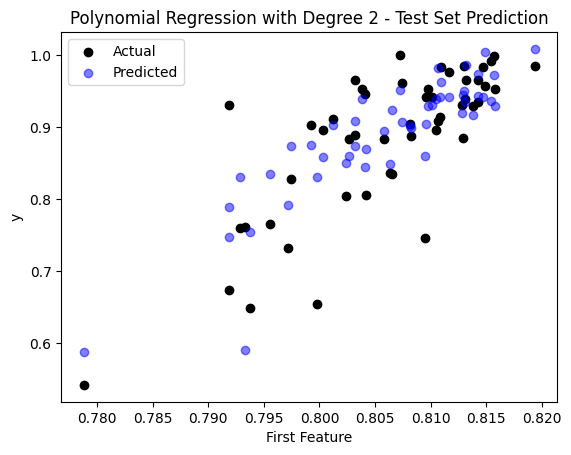

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

polynomial_features = PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

X_poly_test = polynomial_features.transform(X_test)

y_pred_poly = model_poly.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred_poly)
print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)
plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
plt.scatter(X_test[sample_idx, 0], y_pred_poly[sample_idx], color='blue', label='Predicted', alpha=0.5)
plt.title('Polynomial Regression with Degree 2 - Test Set Prediction')
plt.xlabel('First Feature')
plt.ylabel('y')
plt.legend()
plt.show()

,Feature,Coefficient,Abs_Coefficient
252,Feature20^2,-2.788747e+00,2.788747e+00
5,Feature4,-2.477132e+00,2.477132e+00
6,Feature5,-2.423360e+00,2.423360e+00
4,Feature3,-2.397877e+00,2.397877e+00
10,Feature9,-2.234714e+00,2.234714e+00
...,...,...,...
73,Feature2 Feature12,5.515843e-03,5.515843e-03
209,Feature12 Feature13,-5.450385e-03,5.450385e-03
68,Feature2 Feature7,-4.422029e-03,4.422029e-03
54,Feature1 Feature12,-6.594941e-04,6.594941e-04


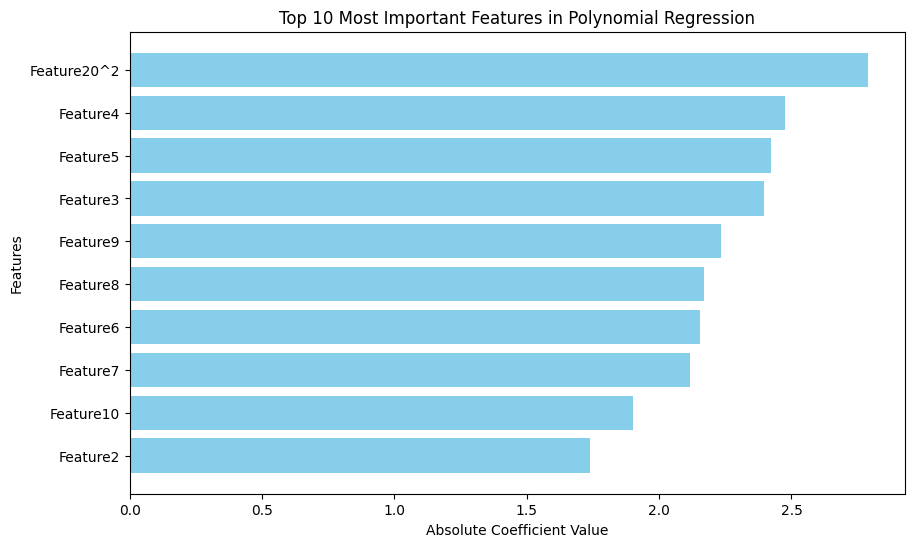

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

num_original_features = X_train.shape[1]
original_feature_names = [f'Feature{i}' for i in range(0, num_original_features)]
feature_names = polynomial_features.get_feature_names_out(input_features=original_feature_names)

# Extract coefficients from the trained model
coefficients = model_poly.coef_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Compute absolute coefficients for ranking
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

display(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Abs_Coefficient'][:10], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features in Polynomial Regression')
plt.gca().invert_yaxis()
plt.show()


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Identify the top 5 original features (before polynomial transformation)
top5_original_features = (
    feature_importance_df[feature_importance_df["Feature"].str.match(r'Feature\d+$')]
    .nlargest(5, "Abs_Coefficient")["Feature"]
    .tolist()
)

print(f"Top 5 Original Features for Polynomial Regression: {top5_original_features}")

# Extract column indices corresponding to selected features
top5_indices_poly = [int(f.replace("Feature", "")) for f in top5_original_features]

# Reduce dataset to only selected original features
X_train_poly_top5 = X_train[:, top5_indices_poly]
X_test_poly_top5 = X_test[:, top5_indices_poly]

# Apply polynomial transformation
polynomial_features_top5 = PolynomialFeatures(degree=2)
X_poly_train_top5 = polynomial_features_top5.fit_transform(X_train_poly_top5)
X_poly_test_top5 = polynomial_features_top5.transform(X_test_poly_top5)

# Retrain the Polynomial Regression model
model_poly_top5 = LinearRegression()
model_poly_top5.fit(X_poly_train_top5, y_train)

# Make predictions
y_pred_poly_top5 = model_poly_top5.predict(X_poly_test_top5)

# Calculate and compare MSE
mse_poly_top5 = mean_squared_error(y_test, y_pred_poly_top5)
mse_poly_full = mean_squared_error(y_test, y_pred_poly)

print(f"🔹 Polynomial Regression MSE - All Features: {mse_poly_full:.4f}, Top 5 Features: {mse_poly_top5:.4f}")


📌 Top 5 Original Features for Polynomial Regression: ['Feature4', 'Feature5', 'Feature3', 'Feature9', 'Feature8']
🔹 Polynomial Regression MSE - All Features: 0.0031, Top 5 Features: 0.0033


### Feature Importance in Neural Networks

Unlike traditional models, neural networks do not have explicit feature importance scores. Instead, we estimate importance using **permutation importance** and **SHAP (SHapley Additive exPlanations)**.

- **Permutation Importance** measures how much the model's error increases when a feature's values are randomly shuffled.
- **SHAP values** explain how each feature contributes to individual predictions.

Below, we apply these methods to interpret the neural network’s decision-making process.


Epoch 1/10


 /usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0190
Epoch 2/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 3/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 4/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047
Epoch 5/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Epoch 6/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Epoch 7/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Epoch 8/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 9/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 10/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The Mean Squared Error (MSE) on the test set is: 0.0035458731777080923


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,045 (840.02 KB)

 Trainable params: 71,681 (280.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,364 (560.02 KB)

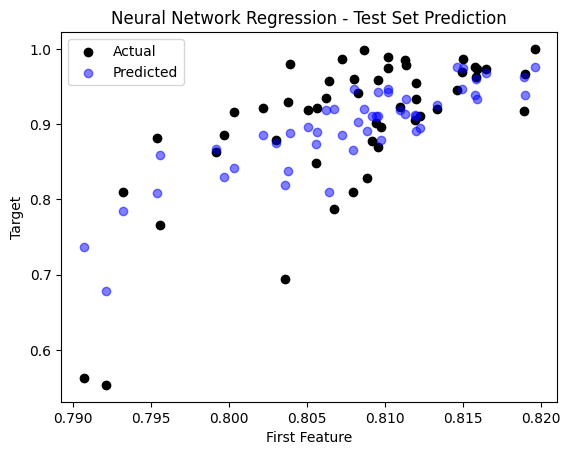

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

model_nn = Sequential([
    Dense(256, activation='relu', input_shape=(21,)),
    Dense(256, activation='relu'),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')

model_nn.fit(X_train, y_train, epochs=10)

y_pred = model_nn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

model_nn.summary()

y_pred_nn = y_pred.flatten()

sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)

plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
plt.scatter(X_test[sample_idx, 0], y_pred_nn[sample_idx], color='blue', label='Predicted', alpha=0.5)
plt.title('Neural Network Regression - Test Set Prediction')
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

PermutationExplainer explainer: 2890it [03:11, 14.25it/s]


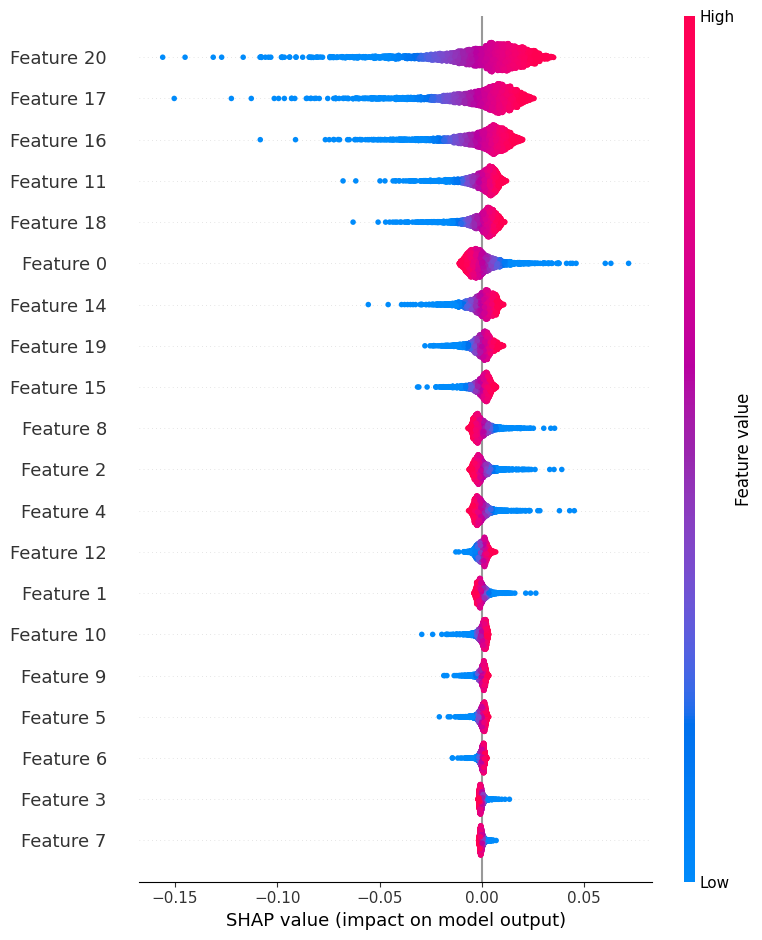

In [15]:
import shap

explainer = shap.Explainer(model_nn, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [17]:
import numpy as np
import pandas as pd
import shap

shap_importance = np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP value per feature

feature_importance_df_nn = pd.DataFrame({
    "Feature": [f"Feature{i}" for i in range(X_train.shape[1])],
    "Importance": shap_importance
})

top5_nn = feature_importance_df_nn.nlargest(5, "Importance")["Feature"].tolist()
print(f"Top 5 Features for Neural Network: {top5_nn}")

top5_indices_nn = [int(f.replace("Feature", "")) for f in top5_nn]

X_train_nn_top5 = X_train[:, top5_indices_nn]
X_test_nn_top5 = X_test[:, top5_indices_nn]


model_nn_top5 = Sequential([
    Dense(256, activation='relu', input_shape=(5,)),
    Dense(256, activation='relu'),
    Dense(1)
])

model_nn_top5.compile(optimizer='adam', loss='mean_squared_error')
model_nn_top5.fit(X_train_nn_top5, y_train, epochs=10, verbose=0)

# Make Predictions
y_pred_nn_top5 = model_nn_top5.predict(X_test_nn_top5).flatten()

# Calculate MSE
mse_nn_top5 = mean_squared_error(y_test, y_pred_nn_top5)
mse_nn_full = mean_squared_error(y_test, y_pred_nn)

print(f"🔹 Neural Network MSE - All Features: {mse_nn_full:.4f}, Top 5 Features: {mse_nn_top5:.4f}")


PermutationExplainer explainer: 2890it [03:12, 14.19it/s]
 /usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


📌 Top 5 Features for Neural Network: ['Feature20', 'Feature17', 'Feature16', 'Feature11', 'Feature18']
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
🔹 Neural Network MSE - All Features: 0.0035, Top 5 Features: 0.0042


### Feature Importance in Gaussian Process Regression (GPR)

Gaussian Process Regression (GPR) uses a kernel function to model complex relationships. When using an **ARD (Automatic Relevance Determination) kernel**, each feature gets an independent **length-scale**:

- **Smaller length-scales** indicate the model is more sensitive to that feature, meaning it has higher importance.
- **Larger length-scales** mean the feature has less influence on predictions.

In the next section, we compute feature importance using the inverse of the length-scales from the trained GPR model.


In [6]:
import numpy
print(numpy.__version__)

1.26.4


The Mean Squared Error (MSE) on the test set is: 0.0031077073475976776

Feature Importance based on ARD Kernel:
       Feature  Length-Scale  Importance
20  Feature 21      0.833075    1.200371
17  Feature 18      0.958873    1.042890
10  Feature 11      0.969100    1.031885
16  Feature 17      0.970376    1.030528
5    Feature 6      0.981548    1.018799
7    Feature 8      0.986074    1.014123
13  Feature 14      0.992900    1.007151
4    Feature 5      0.994113    1.005922
11  Feature 12      1.009720    0.990373
8    Feature 9      1.010618    0.989493


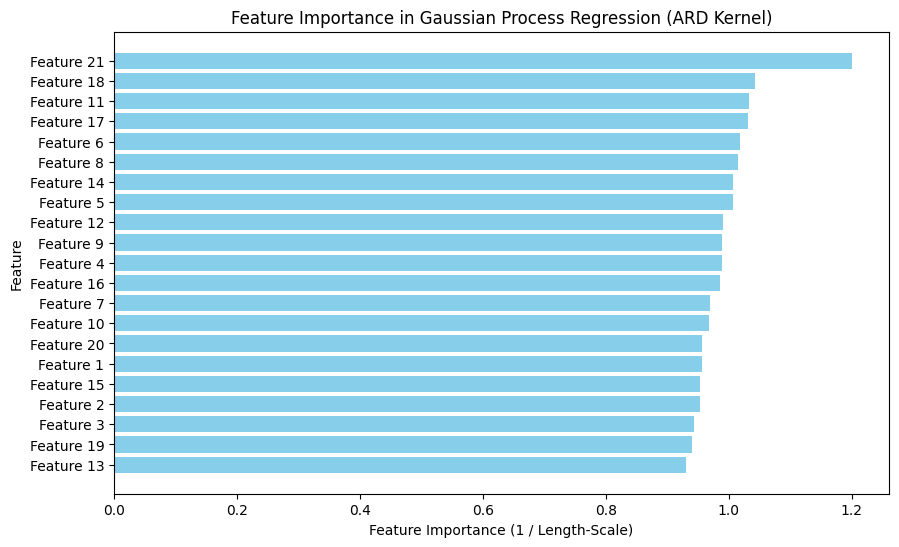

In [20]:
import numpy as np
import GPy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

kernel = GPy.kern.RBF(input_dim=21, ARD=True)
num_inducing = 10

# Train Sparse Gaussian Process Regression with ARD
gp = GPy.models.SparseGPRegression(X_train, y_train.reshape(-1, 1), kernel, num_inducing=num_inducing)
gp.optimize(messages=True)

# Make predictions
y_pred_gp, variance = gp.predict(X_test)
y_pred_gp = y_pred_gp.flatten()
sigma = np.sqrt(variance).flatten()
mse = mean_squared_error(y_test, y_pred_gp)
print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

# Extract length-scales for each feature (smaller = more important)
length_scales = gp.kern.lengthscale.values

# Compute feature importance as 1 / length-scale
feature_importance = 1 / length_scales

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": [f"Feature {i+1}" for i in range(len(length_scales))],
    "Length-Scale": length_scales,
    "Importance": feature_importance
})

# Sort by importance (higher = more important)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance DataFrame
print("\nFeature Importance based on ARD Kernel:")
print(feature_importance_df.head(10))  # Show top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance (1 / Length-Scale)")
plt.ylabel("Feature")
plt.title("Feature Importance in Gaussian Process Regression (ARD Kernel)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [23]:
import GPy
import numpy as np
from sklearn.metrics import mean_squared_error

# Select top 5 most important features
top5_gp = feature_importance_df.nlargest(5, "Importance")["Feature"].tolist()
# Convert feature names to zero-based indices
top5_indices_gp = [int(f.replace("Feature ", "")) - 1 for f in top5_gp]

# Print the corrected feature names
corrected_top5_gp = [f"Feature {i}" for i in top5_indices_gp]
print(f"Top 5 Features for Gaussian Process Regression: {corrected_top5_gp}")

# Convert feature names to zero-based indices (subtract 1)
top5_indices_gp = [int(f.replace("Feature ", "")) - 1 for f in top5_gp]

# Reduce dataset to only selected features
X_train_gp_top5 = X_train[:, top5_indices_gp]
X_test_gp_top5 = X_test[:, top5_indices_gp]

# Retrain the GP model using only these features
kernel_top5 = GPy.kern.RBF(input_dim=5, ARD=True)
gp_top5 = GPy.models.SparseGPRegression(X_train_gp_top5, y_train.reshape(-1, 1), kernel_top5, num_inducing=10)
gp_top5.optimize(messages=True)

# Make Predictions
y_pred_gp_top5, variance_gp_top5 = gp_top5.predict(X_test_gp_top5)
y_pred_gp_top5 = y_pred_gp_top5.flatten()

# Calculate MSE for comparison
mse_gp_top5 = mean_squared_error(y_test, y_pred_gp_top5)
mse_gp_full = mean_squared_error(y_test, y_pred_gp)

print(f"🔹 Gaussian Process MSE - All Features: {mse_gp_full:.4f}, Top 5 Features: {mse_gp_top5:.4f}")


📌 Top 5 Features for Gaussian Process Regression: ['Feature 20', 'Feature 17', 'Feature 10', 'Feature 16', 'Feature 5']


🔹 Gaussian Process MSE - All Features: 0.0031, Top 5 Features: 0.0033
